In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import norm

Сгенерируем выборку $X_1, \dots, X_{100}$ из распределения $N(0, 1)$

In [2]:
N = 100
x_dist = norm.rvs(loc=0, scale=1, size=N)

### Модель $N(\theta, 1)$

Выведем оценку максимального правдоподобия:

$$p_\theta (x) = \frac{1}{\sqrt{2\pi}} \exp \left(-\frac{(x - \theta)^2}{2} \right)$$

$$L(\theta ~|~ x) = \prod\limits_{i=1}^n \frac{1}{\sqrt{2\pi}} \exp \left(-\frac{(X_i - \theta)^2}{2} \right) 
= \frac{1}{(2\pi)^{n / 2}} \exp \left(-\frac{\sum\limits_{i=1}^n (X_i - \theta)^2}{2} \right)$$

$$\ln L(\theta ~|~ x) = -\ln (2\pi)^{n / 2} - \frac12 \sum\limits_{i=1}^n (X_i - \theta)^2$$

$$\frac{\partial}{\partial \theta} \ln L(\theta ~|~ x) = \sum\limits_{i=1}^n (X_i - \theta) = n\overline{X} - n\theta$$

$$n\overline{X} = n\theta \; \Rightarrow \; \widehat{\theta} = \overline{X}$$

Построим график модуля отклонения оценки от истинного значения параметра $\theta = 0$:

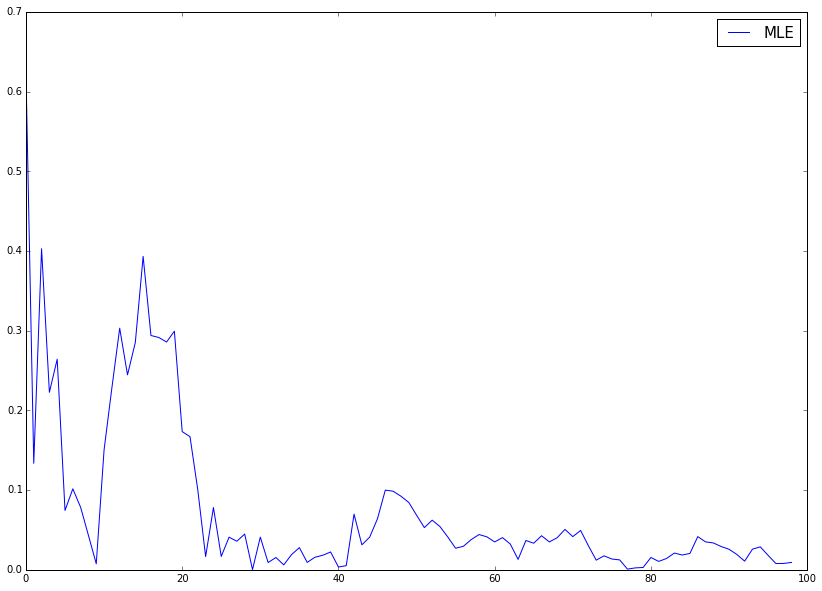

In [6]:
x_estimation = [np.sum(x_dist[:n]) / n for n in range (1, N)]

plt.figure(figsize=(14, 10))
plt.plot(abs(np.zeros(N - 1) - x_estimation), label='MLE')
plt.legend(fontsize=15)
plt.show()

### Модель $N(0, \theta)$

Выведем оценку максимального правдоподобия:

$$p_\theta (x) = \frac{1}{\sqrt{2\pi\theta^2}} \exp \left(-\frac{x^2}{2\theta^2} \right)$$

$$L(\theta ~|~ x) = \prod\limits_{i=1}^n \frac{1}{\sqrt{2\pi\theta^2}} \exp \left(-\frac{X_i^2}{2\theta^2} \right) 
= \frac{1}{(2\pi\theta^2)^{n / 2}} \exp \left(-\frac{\sum\limits_{i=1}^n X_i^2}{2\theta^2} \right)$$

$$\ln L(\theta ~|~ x) = -\ln (2\pi)^{n / 2} - \frac{n}{2} \ln \theta^2 - \frac{\sum\limits_{i=1}^n X_i^2}{2\theta^2}$$

$$\frac{\partial}{\partial \theta^2} \ln L(\theta ~|~ x) 
= -\frac{n}{2\theta^2} + \frac{\sum\limits_{i=1}^n X_i^2}{2\theta^4}$$

$$\frac{\sum\limits_{i=1}^n X_i^2}{2\theta^4} = \frac{n}{2\theta^2} \; \Rightarrow \; \widehat{\theta^2} 
= \frac{1}{n} \sum\limits_{i=1}^n X_i^2$$

Построим график модуля отклонения оценки от истинного значения параметра $\theta = 1$:

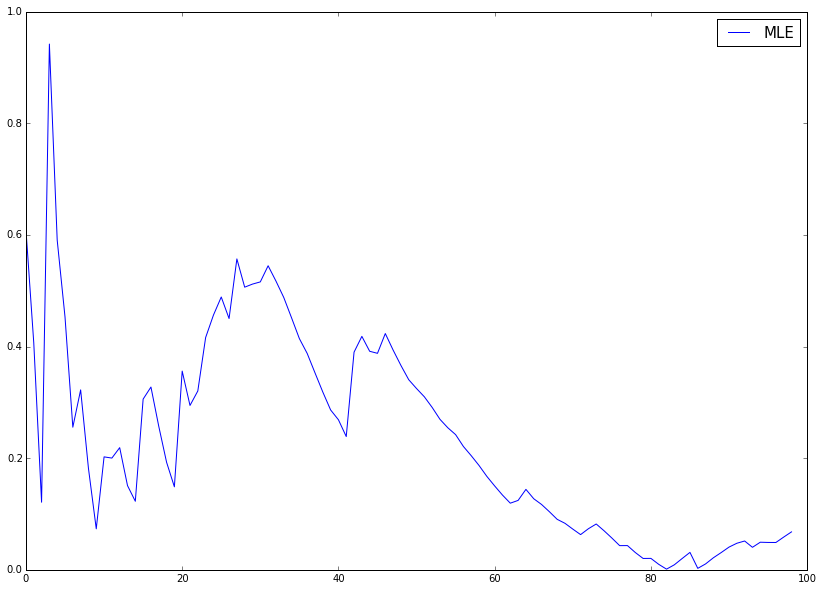

In [10]:
x_estimation = [np.sum(x_dist[:n] ** 2) / n for n in range (1, N)]

plt.figure(figsize=(14, 10))
plt.plot(abs(np.zeros(N - 1) + 1 - x_estimation), label='MLE')
plt.legend(fontsize=15)
plt.show()